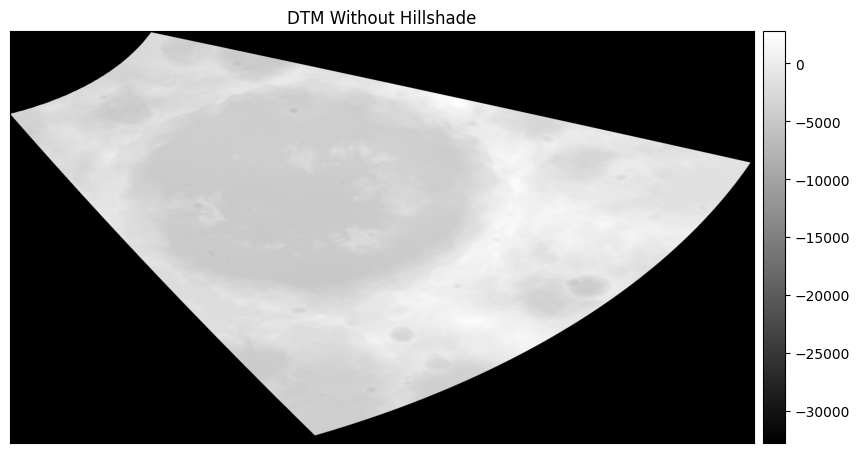

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

# Get the data Folder with images
fold_img = r"D:\Tesis maestria\Luna\GIS\DEM"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda
dem_moon = os.path.join(fold_img, "Schrödinger_Basin.tif")
# Open the DEM with Rasterio
with rio.open(dem_moon) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    # elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_gray",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 1000x600 with 0 Axes>

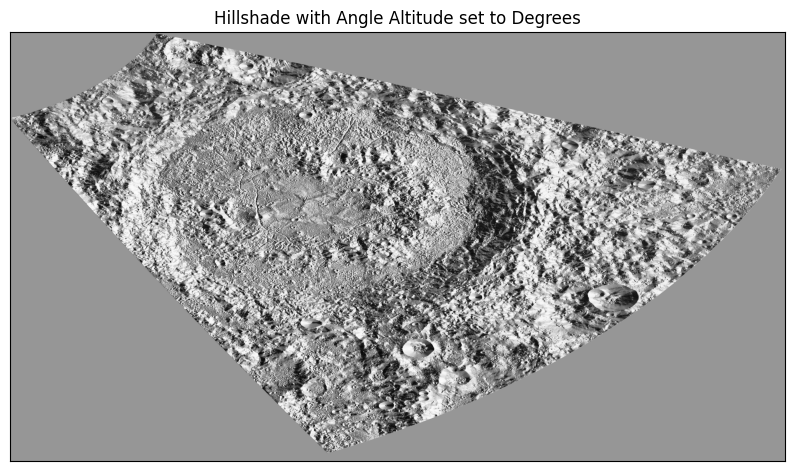

<Figure size 640x480 with 0 Axes>

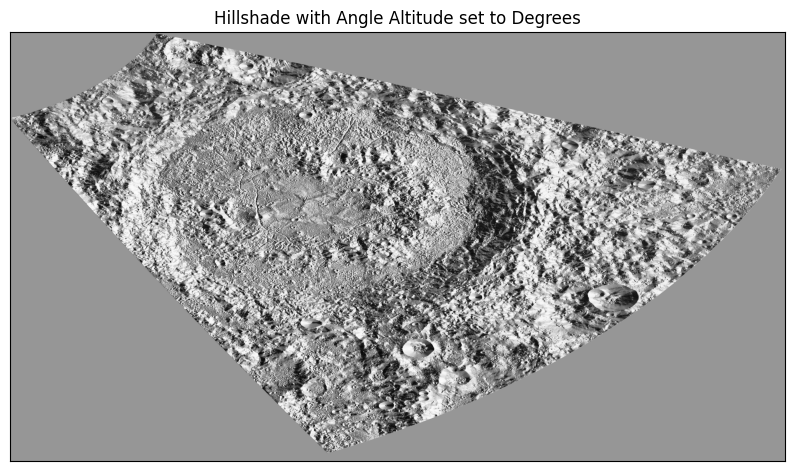

<Figure size 640x480 with 0 Axes>

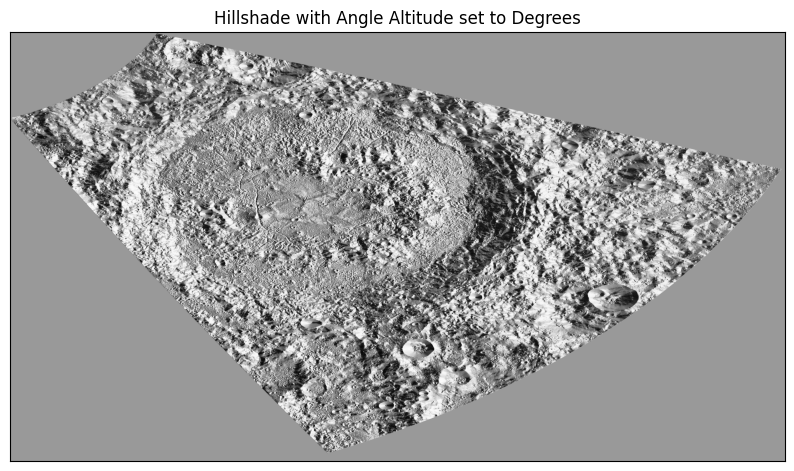

<Figure size 640x480 with 0 Axes>

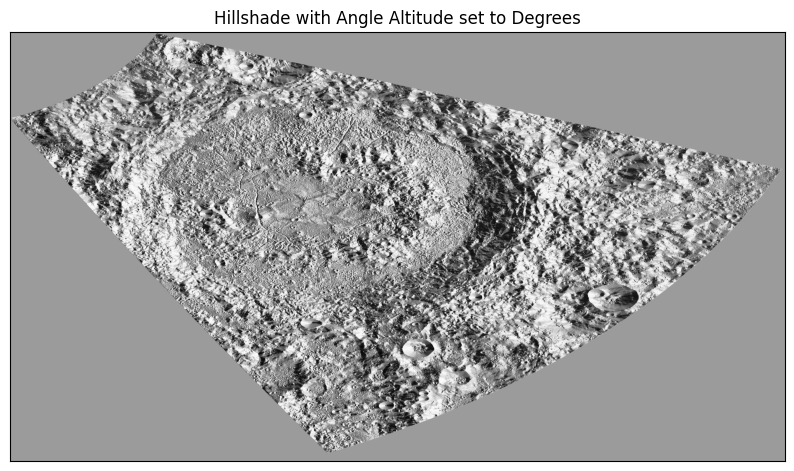

<Figure size 640x480 with 0 Axes>

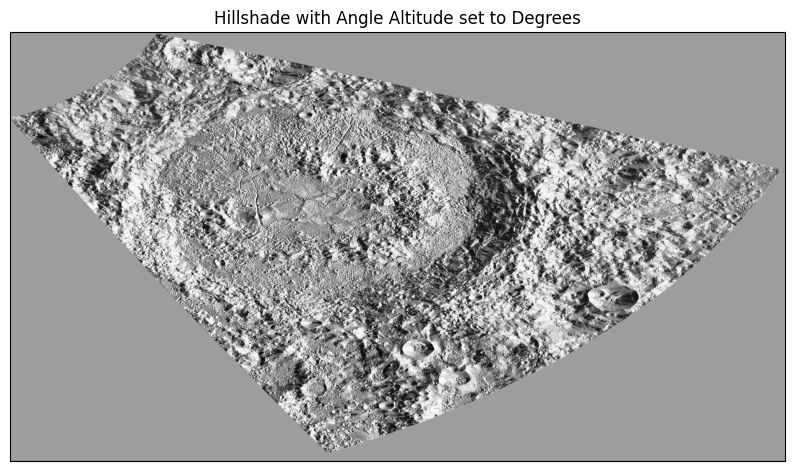

<Figure size 640x480 with 0 Axes>

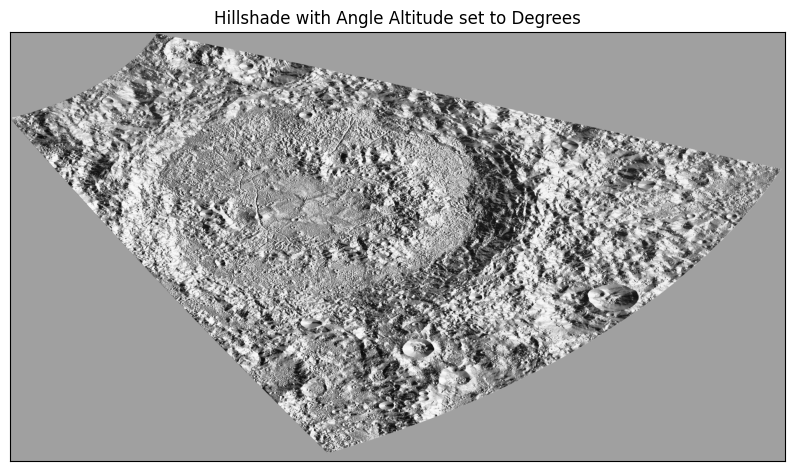

ValueError: unknown file extension: .mp4

In [6]:
import numpy as np
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

azimuth = [90]
altitude = np.arange(0, 5)


# Función para actualizar el plot en cada cuadro de la animación
def update(frame):
    plt.clf()
    az = azimuth[frame // len(altitude)]
    alt = altitude[frame % len(altitude)]
    hillshade_moon = es.hillshade(elevation, azimuth=az, altitude=alt)
    ep.plot_bands(
        hillshade_moon,
        cbar=False,
        title="Hillshade with Angle Altitude set to Degrees",
        figsize=(10, 6),
    )


# Crear una figura para la animación
fig = plt.figure(figsize=(10, 6))

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(azimuth) * len(altitude), interval=500)

# Guardar la animación como un archivo de video
ani.save("hillshade_animation.mp4", writer="ffmpeg")

# Opcionalmente, también puedes guardar la animación como un archivo GIF
# ani.save('hillshade_animation.gif', writer='imagemagick')

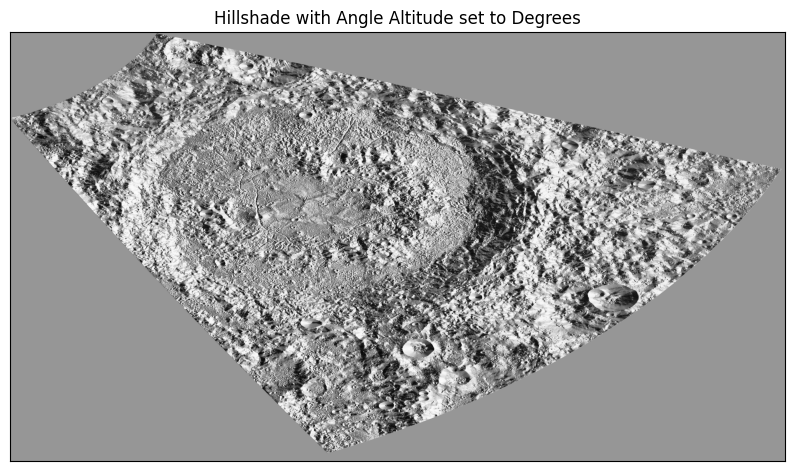

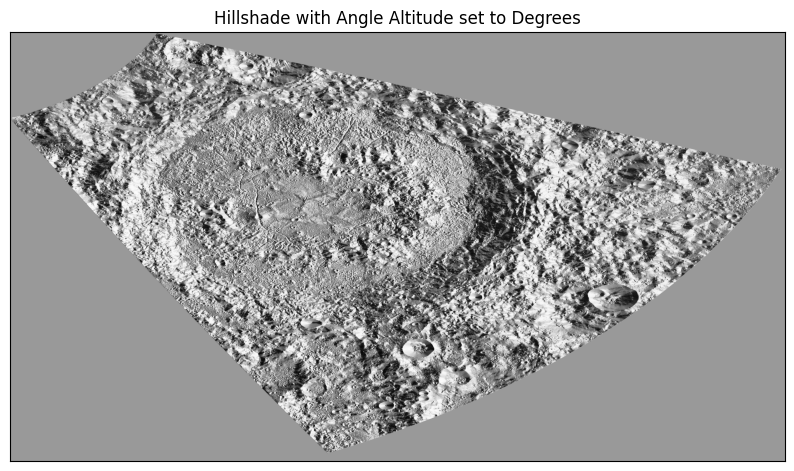

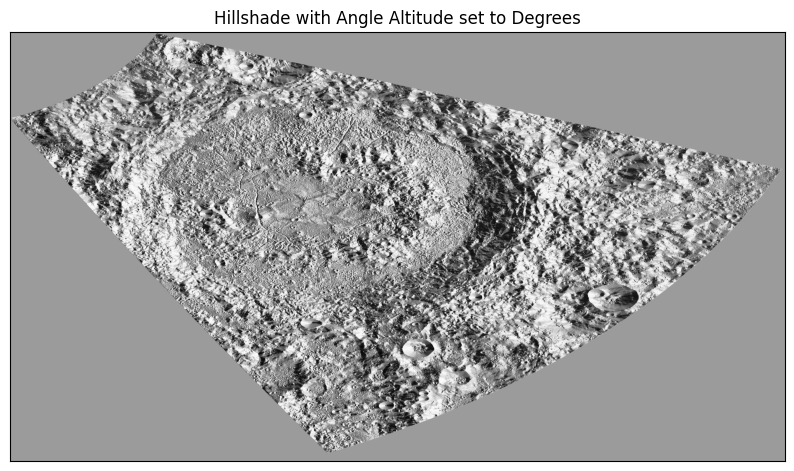

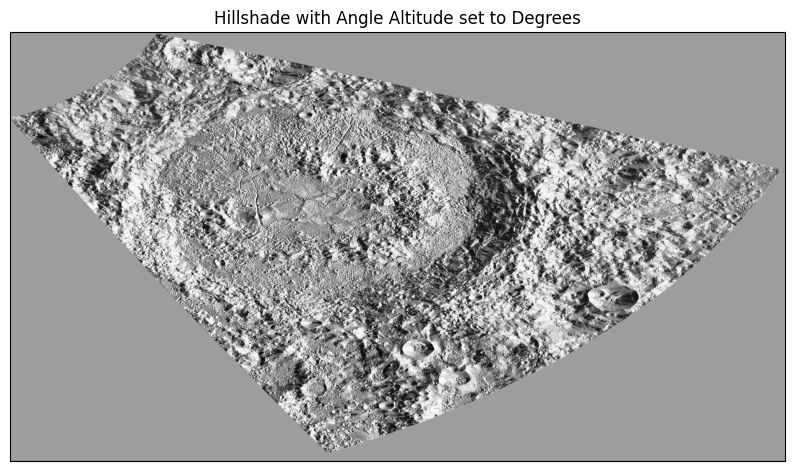

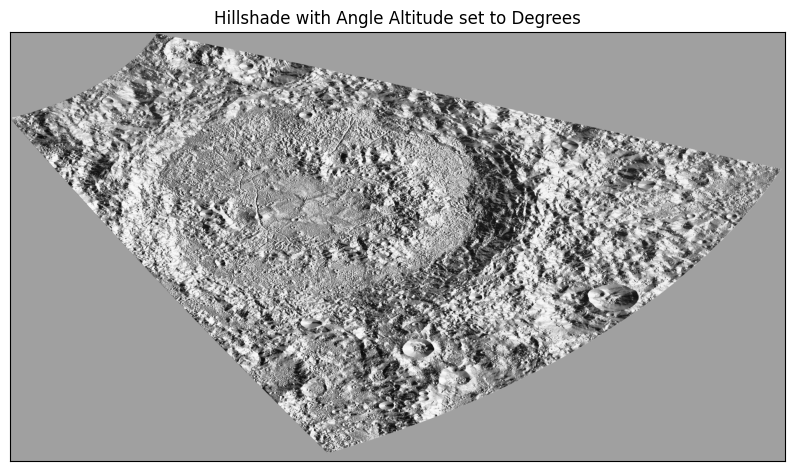

In [69]:
azimuth = [90]
altitude = np.arange(0, 5)
for i in  azimuth:
    for j in altitude:
        # Adjust the azimuth value
        hillshade_moon = es.hillshade(elevation,azimuth=i, altitude=j)

        # Plot the hillshade layer with the modified angle altitude
        ep.plot_bands(
            hillshade_moon,
            cbar=False,
            title="Hillshade with Angle Altitude set to Degrees",
            figsize=(10, 6),
            )
        plt.show()

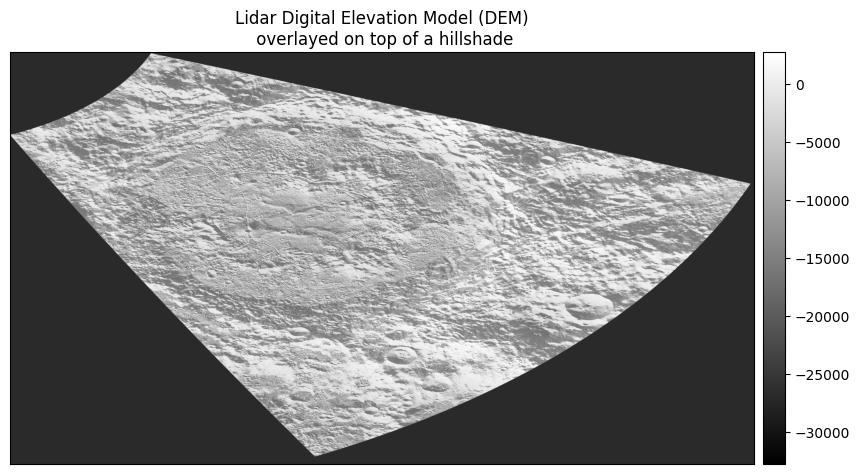

In [38]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="gist_gray",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade_azimuth_210, cmap="Greys", alpha=0.5)
plt.show()